initial number of unique colors
59555


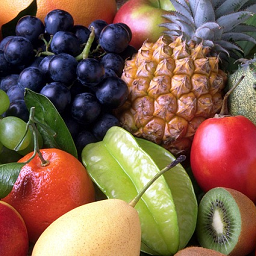

In [38]:
from PIL import Image
import numpy as np
import scipy.misc
img = Image.open("fruit.bmp")
rgb=(img.getdata())
rgb=list(rgb)
#of different colors
print("initial number of unique colors")
print(len(set(rgb)))


img


In [41]:
img = Image.open("fruit.bmp")
##image as an np array of RGB values
rgb=np.array(rgb)

print(rgb)

[[248 196 120]
 [253 203 128]
 [252 202 130]
 ..., 
 [ 15   4   1]
 [ 21   3   0]
 [ 67   4   0]]


In [42]:

def mediancut(rgb,count,ret=[],flag=1):
    """
median cut takes rgb values of an image as np array "rgb"
count = 0 to generate 256 colors; 4 to get 16 colors;
ret=[]
flag =1 for the function to work
returns the ret as a list of color pallets, in RGB
"""
    if flag==1:
        ret = []
    if count < 8:
        
        col=np.array([np.ptp(rgb[:,0]),np.ptp(rgb[:,1]),np.ptp(rgb[:,2])]).argsort()[2]
        rgb=rgb[rgb[:,col].argsort()]
        rgb1=rgb[:(int)(len(rgb)/2),:]
        rgb2=rgb[int(len(rgb)/2):,:]
        (mediancut(rgb1,count+1,ret,0))
        (mediancut(rgb2,count+1,ret,0))
        return ret
    else:
        ret.append([(int)(np.mean(rgb[:,0])),(int)(np.mean(rgb[:,1])),(int)(np.mean(rgb[:,2]))])        
mc=mediancut(rgb,4,[],1)

##final 16 color pallets
print("eplacing all colors with 16 unique colors")
for i in mc:
    print(i)

eplacing all colors with 16 unique colors
[4, 5, 13]
[29, 15, 19]
[40, 33, 29]
[59, 71, 31]
[119, 36, 25]
[182, 40, 36]
[113, 105, 42]
[179, 101, 43]
[73, 62, 74]
[141, 138, 76]
[93, 91, 123]
[146, 153, 147]
[210, 120, 87]
[222, 159, 157]
[224, 216, 142]
[244, 235, 212]


In [43]:
"""
creating a np array by replcaing pallets in original image with mc pallets that's nearest to original
"""
rgbt=[]
for i in rgb:
    dist=[]
    for j in mc:
        
        dist.append(np.sqrt(sum((i-j)**2)))
    dist=np.array(dist)
    rgbt.append([mc[dist.argsort()[0]]])

"""
tring to generate new image from replaced pallets
"""
rgbt= [list(i[0]) for i in rgbt]


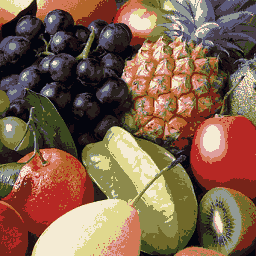

In [28]:
data=[tuple(pixel) for pixel in rgbt]

img2 = Image.new(img.mode, img.size)
img2.putdata(data)
##output after mediancut
img2